In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install transformers

In [3]:
from transformers import pipeline

In [4]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
classifier("this is a good movie")

[{'label': 'POSITIVE', 'score': 0.9998646974563599}]

In [6]:
classifier(["ram is good","chomu is ugly"])

[{'label': 'POSITIVE', 'score': 0.9998446702957153},
 {'label': 'NEGATIVE', 'score': 0.9997555613517761}]

In [7]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-03-21 11:45:20--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M   358KB/s    in 8.4s    

2023-03-21 11:45:29 (397 KB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [8]:
import numpy as np
import pandas as pd

In [9]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [10]:
df = pd.read_csv('/kaggle/input/tweet-for-airline/Tweets.csv')

In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**select the columns we need .. the text and its target**

In [12]:
df = df[['text','airline_sentiment']]

In [13]:
df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


<AxesSubplot:>

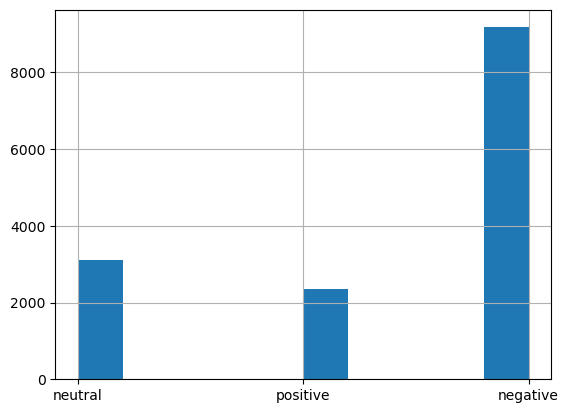

In [14]:
df['airline_sentiment'].hist()

**HUGGINNG FACE MODEL CANNOT PREDICT NEUTRAL . HENCE WE DROP IT.**

In [15]:
df = df[df.airline_sentiment != 'neutral']

In [16]:
df.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [17]:
text = df['text'].tolist()
predictions = classifier(text)


In [18]:
#predictions

***WE MUST CONVERT ALL PROBABLITIES TO CLASS OF ONE TYPE . BE IT POSTIIVE OR NEGATIVE ***

In [19]:
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score']  for d in predictions ]

**CONVERTING CATEGORICAL COLS**

In [20]:
preds = [ 1 if d['label'].startswith('P') else  0 for d in predictions]

In [21]:
#preds

In [22]:
preds = np.array(preds)

In [23]:
preds

array([1, 0, 0, ..., 1, 0, 0])

In [24]:
df['target'] = np.where(df['airline_sentiment'] == 'positive', 1, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
print("accuracy: ",np.mean(df['target']==preds))

accuracy:  0.8898708950697514
